<p style="color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:40px; font-style:normal"><b>TRANSFORMATION D'IMAGES</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2023-01</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

L'objectif de cette feuille d'exercices est d'illustrer le principe de la ***transformation d'images par algorithmes***. Les algorithmes de **génération** (présentés dans la feuille d'exercices A) permettent de créer une image en fonction d'un ensemble de paramètres numériques fournis par l'utilisateur, et destinés à contrôler le processus de création. A l'inverse, les algorithmes de **transformation** (présentés dans ce notebook) doivent impérativement partir d'une image existante qui servira de base pour la création de la nouvelle image. Il existe aujourd'hui un très grand catalogue d'algorithmes de transformations d'images permettant d'obtenir des effets visuels extrêmement variés, mais toutes ces techniques peuvent être classés en trois catégories principales :

- **Transformations géométriques :** La transformation appliquée à un pixel ne dépend que de sa position
- **Transformations optiques :** La transformation appliquée à un pixel ne dépend que de sa couleur
- **Transformations par filtre :** La transformation appliquée à un pixel dépend de sa position, de sa couleur, ainsi que des positions et des couleurs des pixels de son voisinage

---
Le package **numpy** pourrait évidemment être largement suffisant pour réaliser toutes les transformations d'images abordées dans cette feuille d'exercices. Néanmoins, le package **Pillow** fournit des outils de plus haut niveau, ce qui va grandement simplifier la plupart des opérations à mettre en oeuvre. Avant de commencer cette feuille d'exercices, il est donc fortement recommandé de relire le notebook **06-Pillow.ipynb** qui contient les éléments de cours correspondants.

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
import PIL.Image as pim # import du module 'Image' du package 'Pillow' avec alias 'pim'
import PIL.ImageOps as pio # idem avec module 'ImageOps'
import PIL.ImageChops as pic # idem avec module 'ImageChops'
import PIL.ImageFilter as pif # idem avec module 'ImageFilter'
import PIL.ImageDraw as pid # idem avec module 'ImageDraw'
from SRC.tools import show, view # import de deux fonctions du module 'tools'
import warnings; warnings.filterwarnings('ignore') # on ignore les 'warnings'

<h2 style="padding:16px; color:white; background:#07D">Exercice C1 - Transformations géométriques</b></h2>

Ecrire les instructions Python permettant de générer les 8 images de la figure ci-dessous. Chaque image individuelle est obtenue en appliquant une transformation géométrique sur l'image du [**tigre**](IMG/tiger.jpg) utilisée dans le chapitre 6 du cours (la zone noire visible sur certaines images correspond à la taille initiale de l'image, soit 640x480 pixels). Les transformations mises en oeuvre pour les 8 images (de gauche à droite et de haut en bas) sont les suivantes :

- double symétrie (verticale et horizontale)
- contraction horizontale à 50%
- contraction uniforme à 50%
- dilatation uniforme à 1600% (+ recadrage autour de l'oeil droit du tigre)
- rotation de 15° (sans modification de la taille de l'image finale)
- rotation de 15° (avec ajustement de la taille de l'image finale)
- cisaillement horizontal
- déformation projective

Vous aurez besoin des méthodes suivantes, définies pour la classe **`pim.Image`** utilisée par **Pillow** (à vous de trouver le rôle de chaque méthode et celui de leurs paramètres) :

- **`img.transpose(method)`**
- **`img.resize(size, method)`**
- **`img.crop(box)`**
- **`img.rotate(angle, expand)`**
- **`img.transform(size, method, data)`**

![](IMG/transfo_geo.png 'transfo_geo.png')

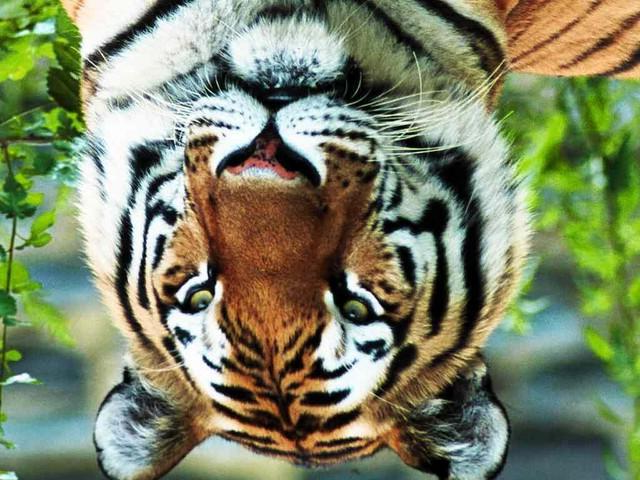

In [3]:
tiger = pim.open('IMG/tiger.jpg') # lecture du fichier 'tiger.jpg' (mode = 'RGB')

# les méthodes possibles pour 'transpose' sont numérotés de 0 à 6, avec les alias suivants : 
# FLIP_LEFT_RIGHT = 0 / FLIP_TOP_BOTTOM / ROTATE_180 / ROTATE_270 / ROTATE_90 / TRANSPOSE / TRANSVERSE = 6
img = tiger.transpose(pim.ROTATE_180) # application d'une rotation de 180°

# les méthodes possibles pour 'resize' sont numérotés de 0 à 5, avec les alias suivants : 
# NEAREST = 0 / BOX / BILINEAR / BICUBIC / HAMMING / LANCZOS = 5

# Pour la contraction d'image (= dézoom), le mode BOX est à privilégier
#img = tiger.resize((320,480), pim.BOX) # contraction horizontale (mode BOX)
#img = tiger.resize((320,240), pim.BOX) # contraction dans les 2 directions (mode BOX)

# Pour la dilatation d'image (= zoom), le mode LANCZOS est à privilégier
w, h = 40, 30; x, y = 265, 155 # définition de la taille et de la position pour la zone à découper
#zone = tiger.crop((x, y, x+w, y+h)) # découpage de la zone autour de l'oeil droit
#img = zone.resize((640,480), pim.BOX) # dilatation (mode BOX) 
#img = zone.resize((640,480), pim.LANCZOS) # dilatation (mode LANCZOS)

view(img) # affichage de l'image finale

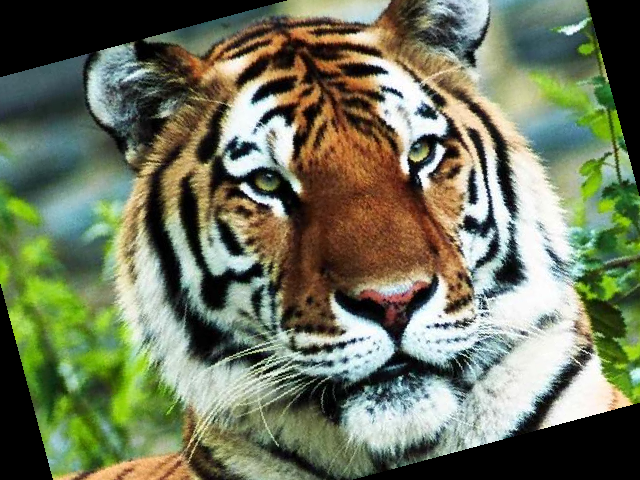

In [4]:
img = tiger.rotate(15) # rotation de 15 degrés (sans modification de la taille de l'image)
#img = tiger.rotate(15, expand=True) # idem avec expansion de l'image pour ne pas perdre d'information

# les méthodes possibles pour 'transform' sont numérotés de 0 à 4, avec les alias suivants : 
# AFFINE = 0 / EXTENT / PERSPECTIVE / QUAD / MESH = 4
# le mode QUAD est le plus intuitif : il suffit de définir les coordonnées des 4 points
# qui vont se retrouver aux 4 coins dans l'image finale (ordre = NW, SW, SE, NE)
#data = (-160,0, 0,480, 800,480, 640,0) # paramètres pour un effet de cisaillement
#data = (-160,-160, -40,520, 640,640, 800,-60) # paramètres pour un effet de perspective
#img = tiger.transform((640,480), pim.QUAD, data=data) # application de la transformation choisie

view(img) # affichage de l'image finale

<h2 style="padding:16px; color:white; background:#07D">Exercice C2 - Découpages et collages</b></h2>

Ecrire les instructions Python permettant de générer les 8 images de la figure ci-dessous. Chaque image individuelle est obtenue en appliquant une transformation géométrique, de type découpage et/ou collage, sur les images du [**tigre**](IMG/tiger.jpg) et du [**smiley**](IMG/smiley.png). Les transformations mises en oeuvre pour les images (de gauche à droite et de haut en bas) sont les suivantes :

- collage périodique d'un rectangle noir
- extraction de la partie gauche de l'image, puis collage avec symétrie horizontale
- extraction de la tête du tigre, puis collage périodique horizontal et vertical
- collages multiples avec redimensionnement et rotation
- découpage de l'image en 12 blocs de 160x160 pixels, puis collage avec permutation aléatoire des blocs
- incrustation d'un smiley au niveau de l'oeil droit du tigre
- incrustation de 25 smileys avec des positions aléatoires sur l'image
- incrustation de 12 smileys, avec des positions aléatoires dans des blocs de 160x160 pixels 

En plus des méthodes de l'exercice C1, vous aurez besoin des méthodes suivantes :

- **`img.new(mode, size, color)`**
- **`img.paste(image, coords)`**

![](IMG/collages.png 'collages.png')

In [ ]:
img = tiger.copy() # création du réceptacle pour le collage (= copie de l'image 'tiger')
bar = pim.new('1', (16, 480), 0) # création d'une image pour les barreaux (couleur = noir)
for p in range(24, 640, 96): img.paste(bar, (p, 0)) # collage des barreaux sur l'image de départ

view(img) # affichage de l'image finale

<h2 style="padding:16px; color:white; background:#07D">Exercice C3 - Transformations optiques</b></h2>

Ecrire les instructions Python permettant de générer les 8 images de la figure ci-dessous. Chaque image individuelle est obtenue en appliquant une transformation optique (sur les canaux R/G/B) sur l'image du [**tigre**](IMG/tiger.jpg) utilisée dans le chapitre 6 du cours. En plus des méthodes de l'exercice C1, vous aurez besoin des méthodes suivantes :

Ecrire les instructions Python permettant de générer les 8 images de la figure ci-dessous. Chaque image individuelle est obtenue en appliquant une transformation géométrique, de type découpage et/ou collage, sur les images du [**tigre**](IMG/tiger.jpg) et du [**smiley**](IMG/smiley.png) utilisées dans le chapitre 6 du cours. Les transformations mises en oeuvre pour les 8 images (de gauche à droite et de haut en bas) sont les suivantes :

- échange des canaux R et B
- combinaison linéaire des canaux RGB : $R' = 0.6R + 0.4G\;, G' = 0.2R + 0.8B\;, B' = B$
- combinaison barycentrique des canaux RGB : $L = 0.299R + 0.587G + 0.114B$
- inversion de l'image de luminance
- binarisation des valeurs de luminance
- binarisation des valeurs RGB
- quantification de la luminance sur 5 niveaux
- ajout de bruit puis quantification des valeurs RGB sur 3 niveaux
- assombrissement de l'image RGB
- éclaircissement de l'image de luminance
- augmentation du contraste de l'image RGB
- diminution du contraste de l'image de luminance

Toutes les transformations demandées peuvent s'effectuer en manipulant les images sous forme de matrice **numpy**

![](IMG/transfo_opt.png 'transfo_opt.png')

In [ ]:
tiger = pim.open('IMG/tiger.jpg') # lecture du fichier 'tiger.jpg' (mode = 'RGB')
img = tiger.copy() # création d'une copie de travail à partir de 'tiger'
# TODO
view(img) # affichage de l'image finale

In [56]:
# définition des deux versions de 'gain' (augmentation ou diminution de luminance)
expo_gain = lambda t,p: t**((1-p)/(1+p))
ratio_gain = lambda t,p: (t+p*t)/(1-p+2*p*t)

# définition des deux versions de 'bias' (augmentation ou diminution de contraste)
expo_bias = lambda t,p: np.where(t < 0.5, 0.5*(2*t)**((1+p)/(1-p)), 1-0.5*(2-2*t)**((1+p)/(1-p)))
ratio_bias = lambda t,p: np.where(t < 0.5, (t-p*t)/(1+p-4*p*t), (t-2*p+3*p*t)/(1-3*p+4*p*t))

# note : le tracé des 4 fonctions pour différentes valeurs de 'p' se trouve sur la figure ci-dessous

<center><img src='IMG/gain_bias.png' width='90%'></center>

<h2 style="padding:16px; color:white; background:#07D">Exercice C4 - Filtres et convolutions</b></h2>

Ecrire les instructions Python permettant de générer les 8 images de la figure ci-dessous. Chaque image individuelle est obtenue en appliquant un filtre ou un noyau de convolution sur l'image du tigre. Selon les transformations à générer, on pourra utiliser soit les fonctions de **Pillow**, soit les fonctions de **numpy**. Les transformations mises en oeuvre pour les 8 images (de gauche à droite et de haut en bas) sont les suivantes :

- conservation d'un seul canal de couleur (R en haut, G au milieu, B en bas)
- coloration de l'image de luminance avec dégradé bleu vers orange
- pixelisation de l'image (blocs de 16x16 pixels)
- application d'un masque circulaire sur l'image
- test de quelques filtres prédéfinis (par exemple, rehaussement des contours)
- application d'un flou gaussien sur les yeux du tigre
- utilisation d'une combinaison de filtres (

![](IMG/filtres.png 'filtres.png')

In [ ]:
tiger = pim.open('IMG/tiger.jpg') # lecture du fichier 'tiger.jpg' (mode = 'RGB')
img = tiger.copy() # création d'une copie de travail à partir de 'tiger'
# TODO
view(img) # affichage de l'image finale

---